In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [61]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [44]:
masses = [
    15, 16, 17, 18, 19, 20, 21, 22
]
couplings = [ -8.5 ]

# couplings = [
#     -9, -8.5
# ]

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]


In [45]:
runs = dict()
for m in masses:
    for g in couplings:
        key = f'm{m:.1f}_g{g:+.2f}'
        print(key)

        run = pd.read_csv(f'csv/{key}/index.csv')
        # run['slices'] = [
        #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
        #     for model in run['slice']
        # ]
    
        runs[key] = run

m15.0_g-8.50
m16.0_g-8.50
m17.0_g-8.50
m18.0_g-8.50
m19.0_g-8.50
m20.0_g-8.50
m21.0_g-8.50
m22.0_g-8.50


In [68]:
colormap = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(15), np.max(22)),
    plt.get_cmap(f'winter')
)


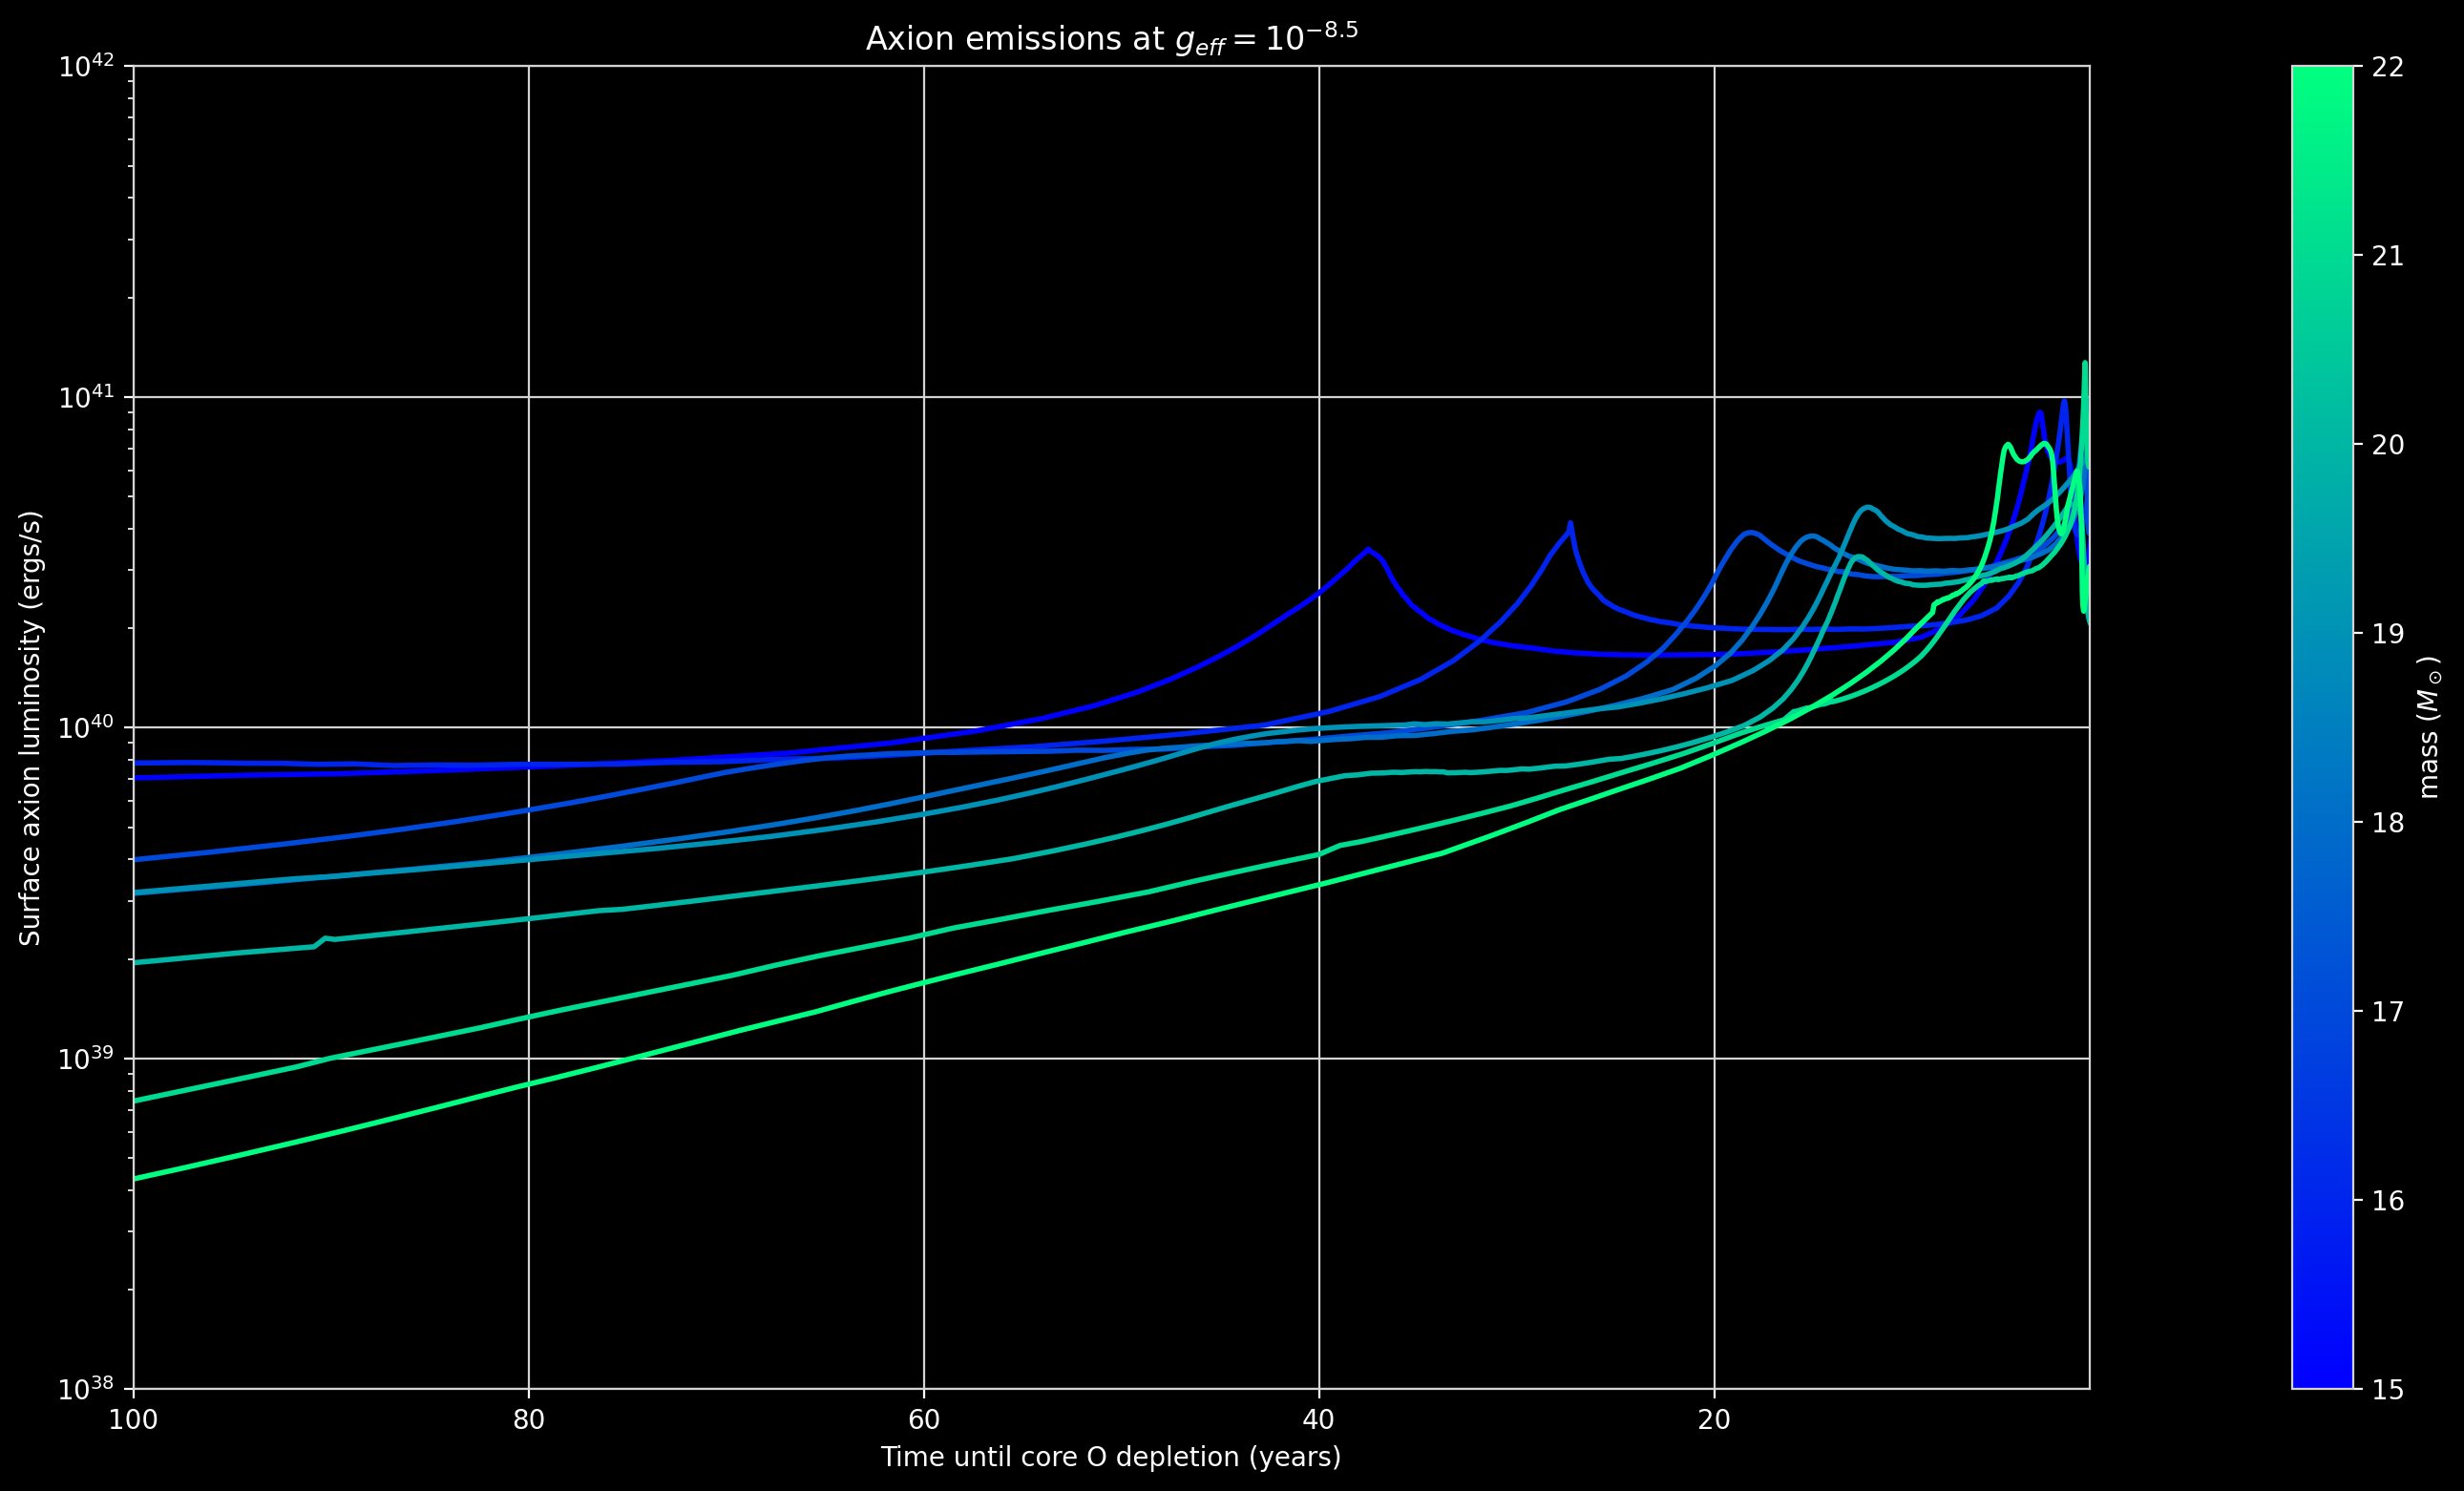

In [91]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))

plt.ylim(1e38, 1e42)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

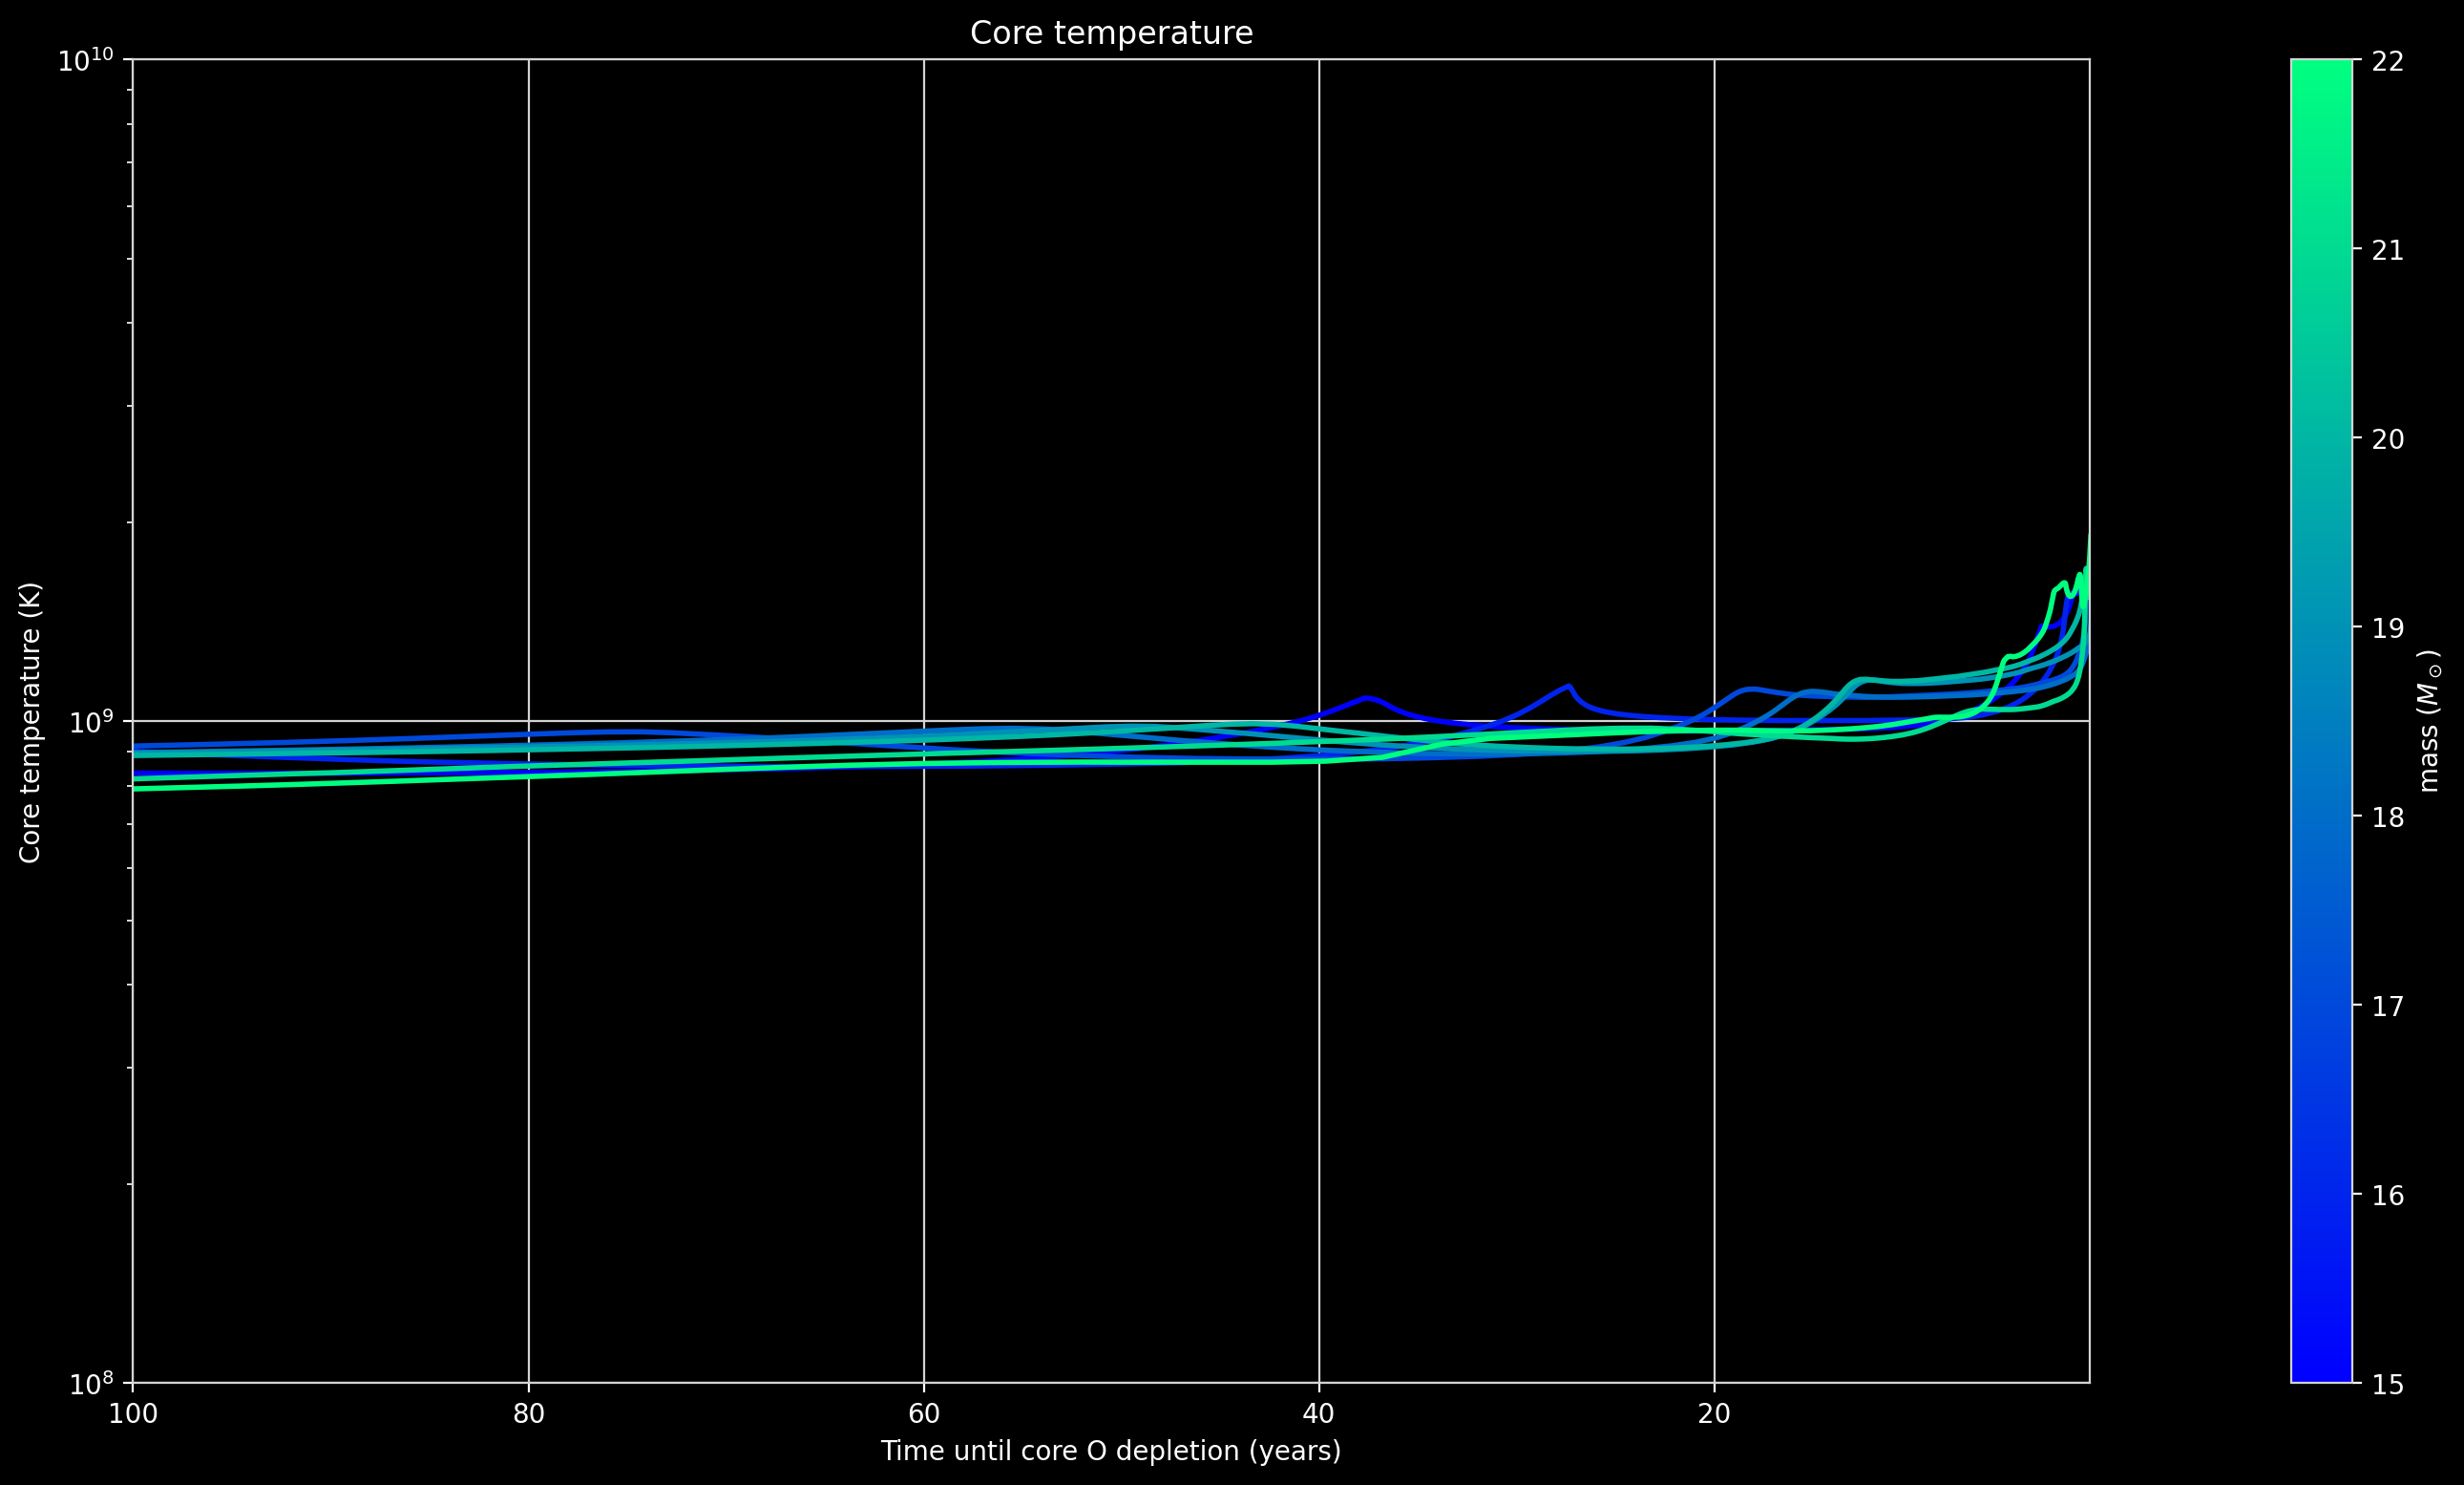

In [97]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e8, 1e10)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Core temperature (K)')
plt.grid()

plt.title('Core temperature', c='white')
plt.show()

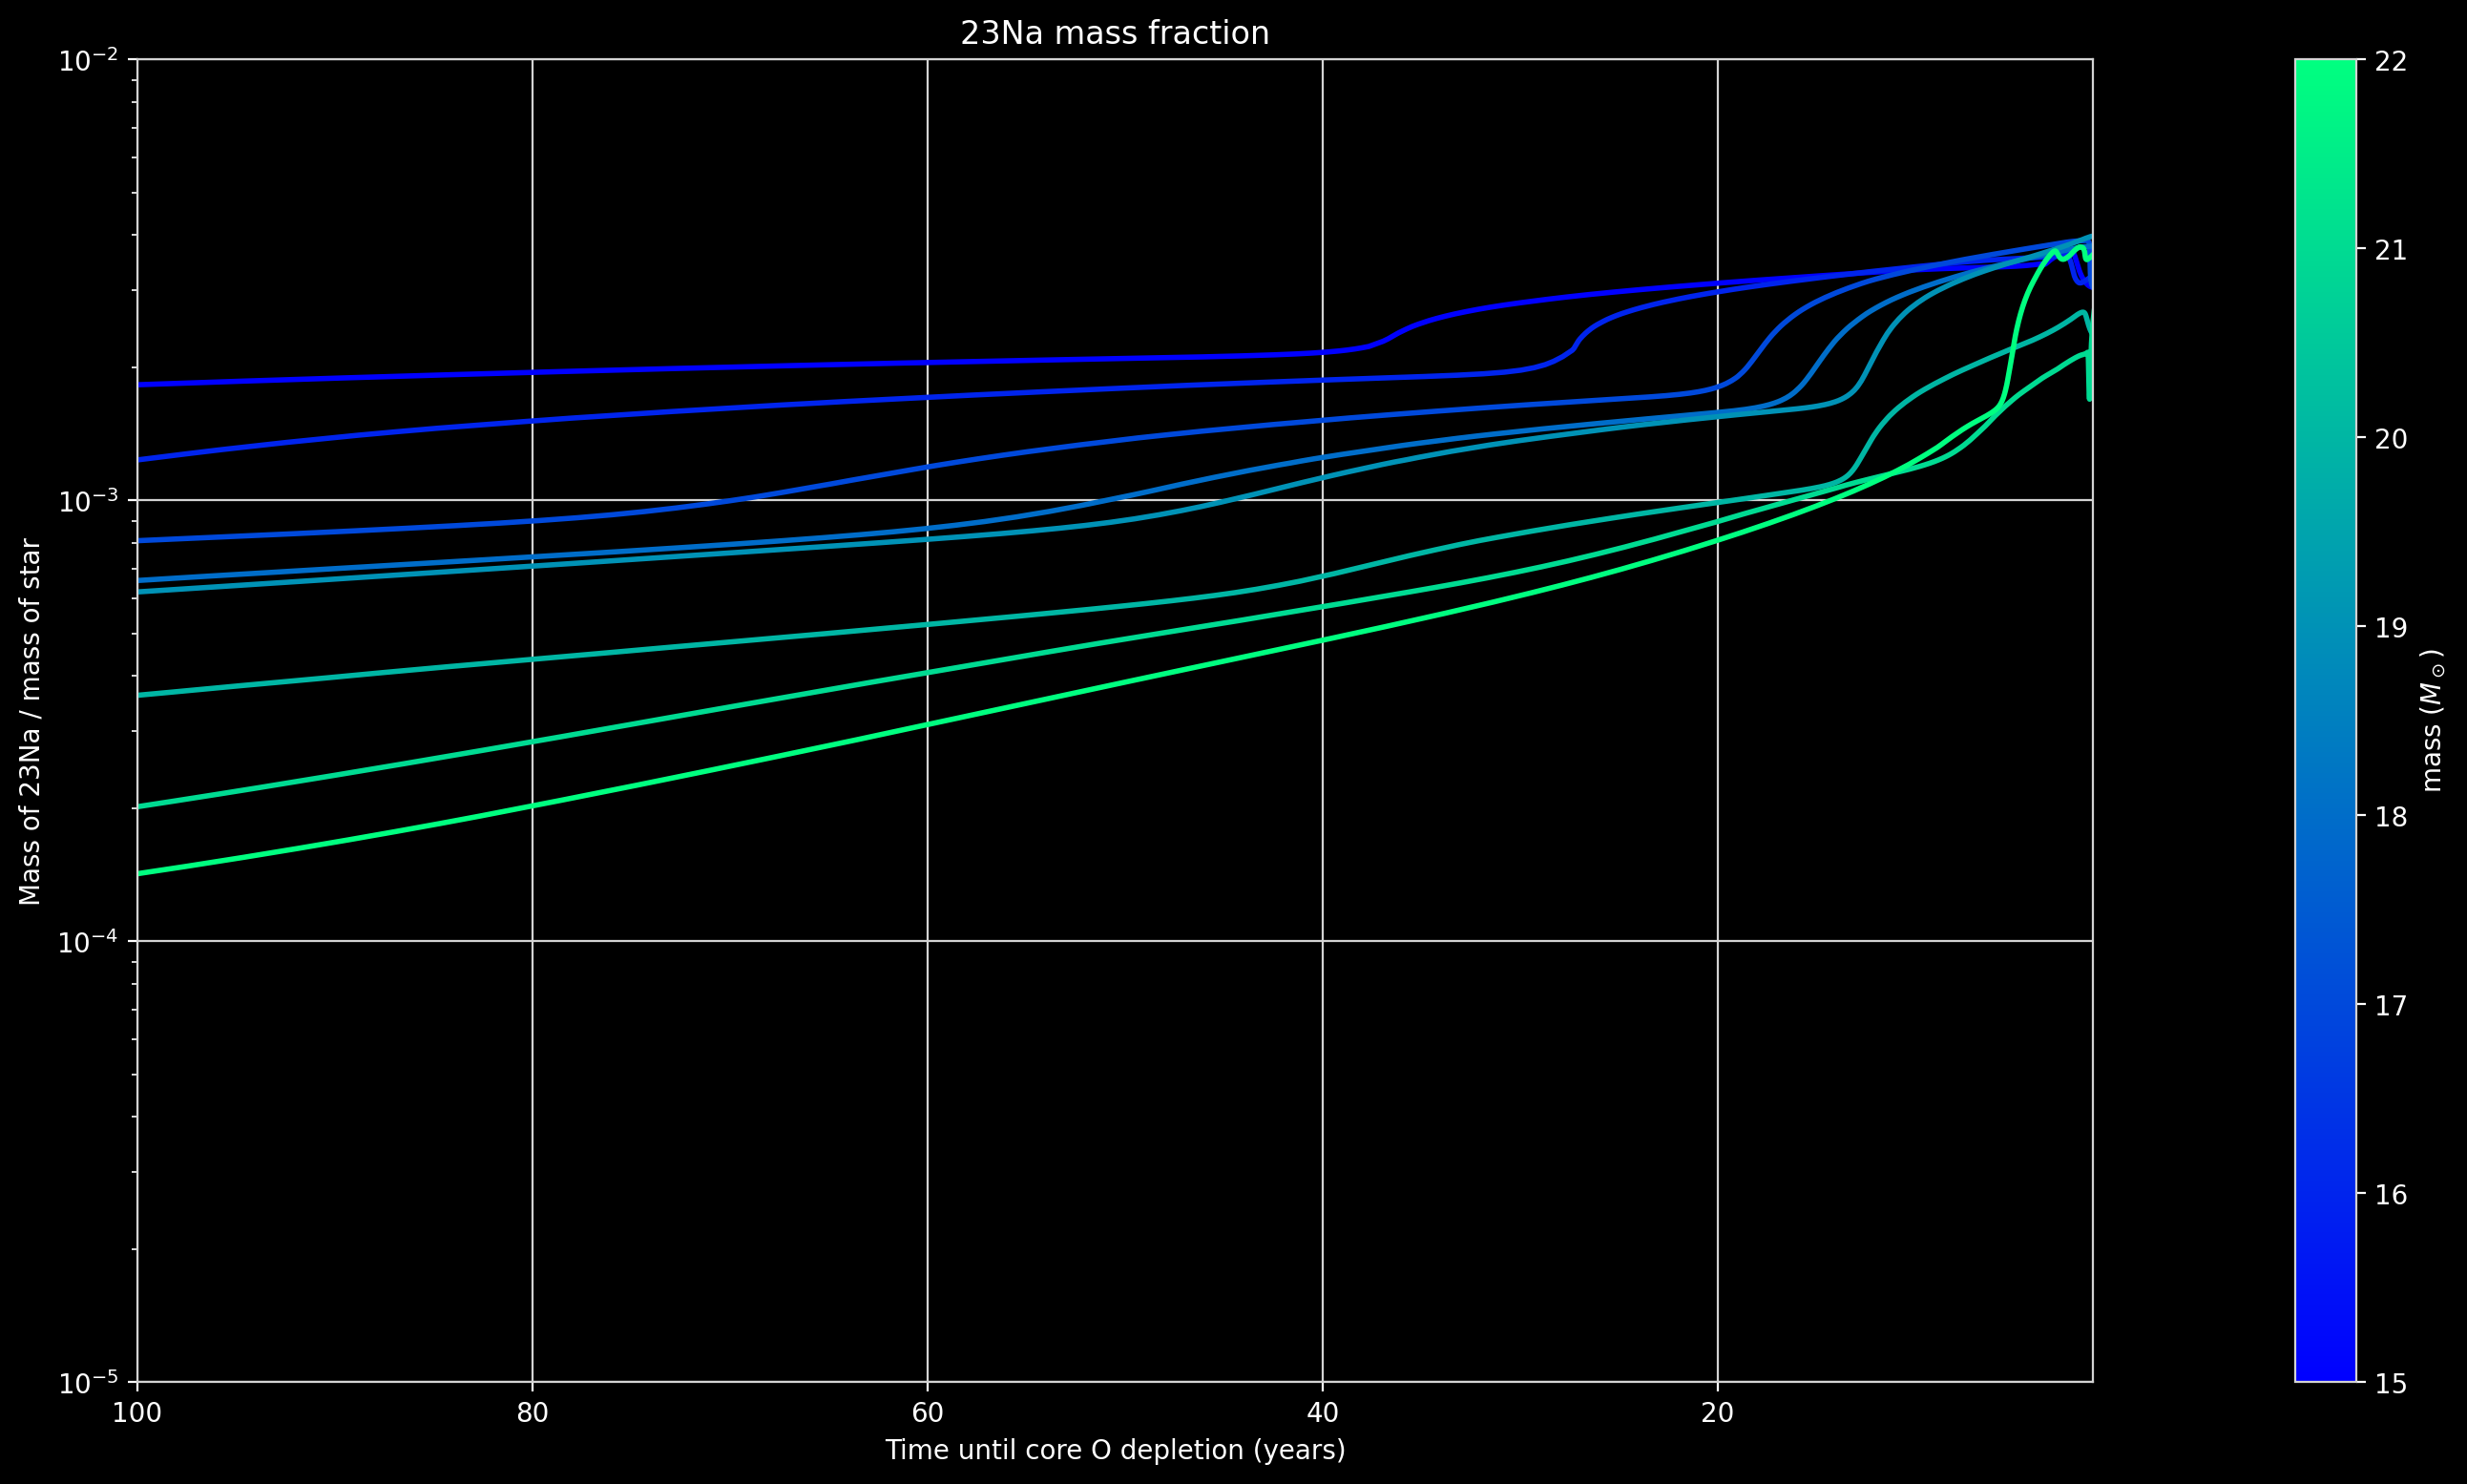

In [93]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['avg X_na23']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e-5, 1e-2)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Mass of 23Na / mass of star')
plt.grid()

plt.title('23Na mass fraction', c='white')
plt.show()

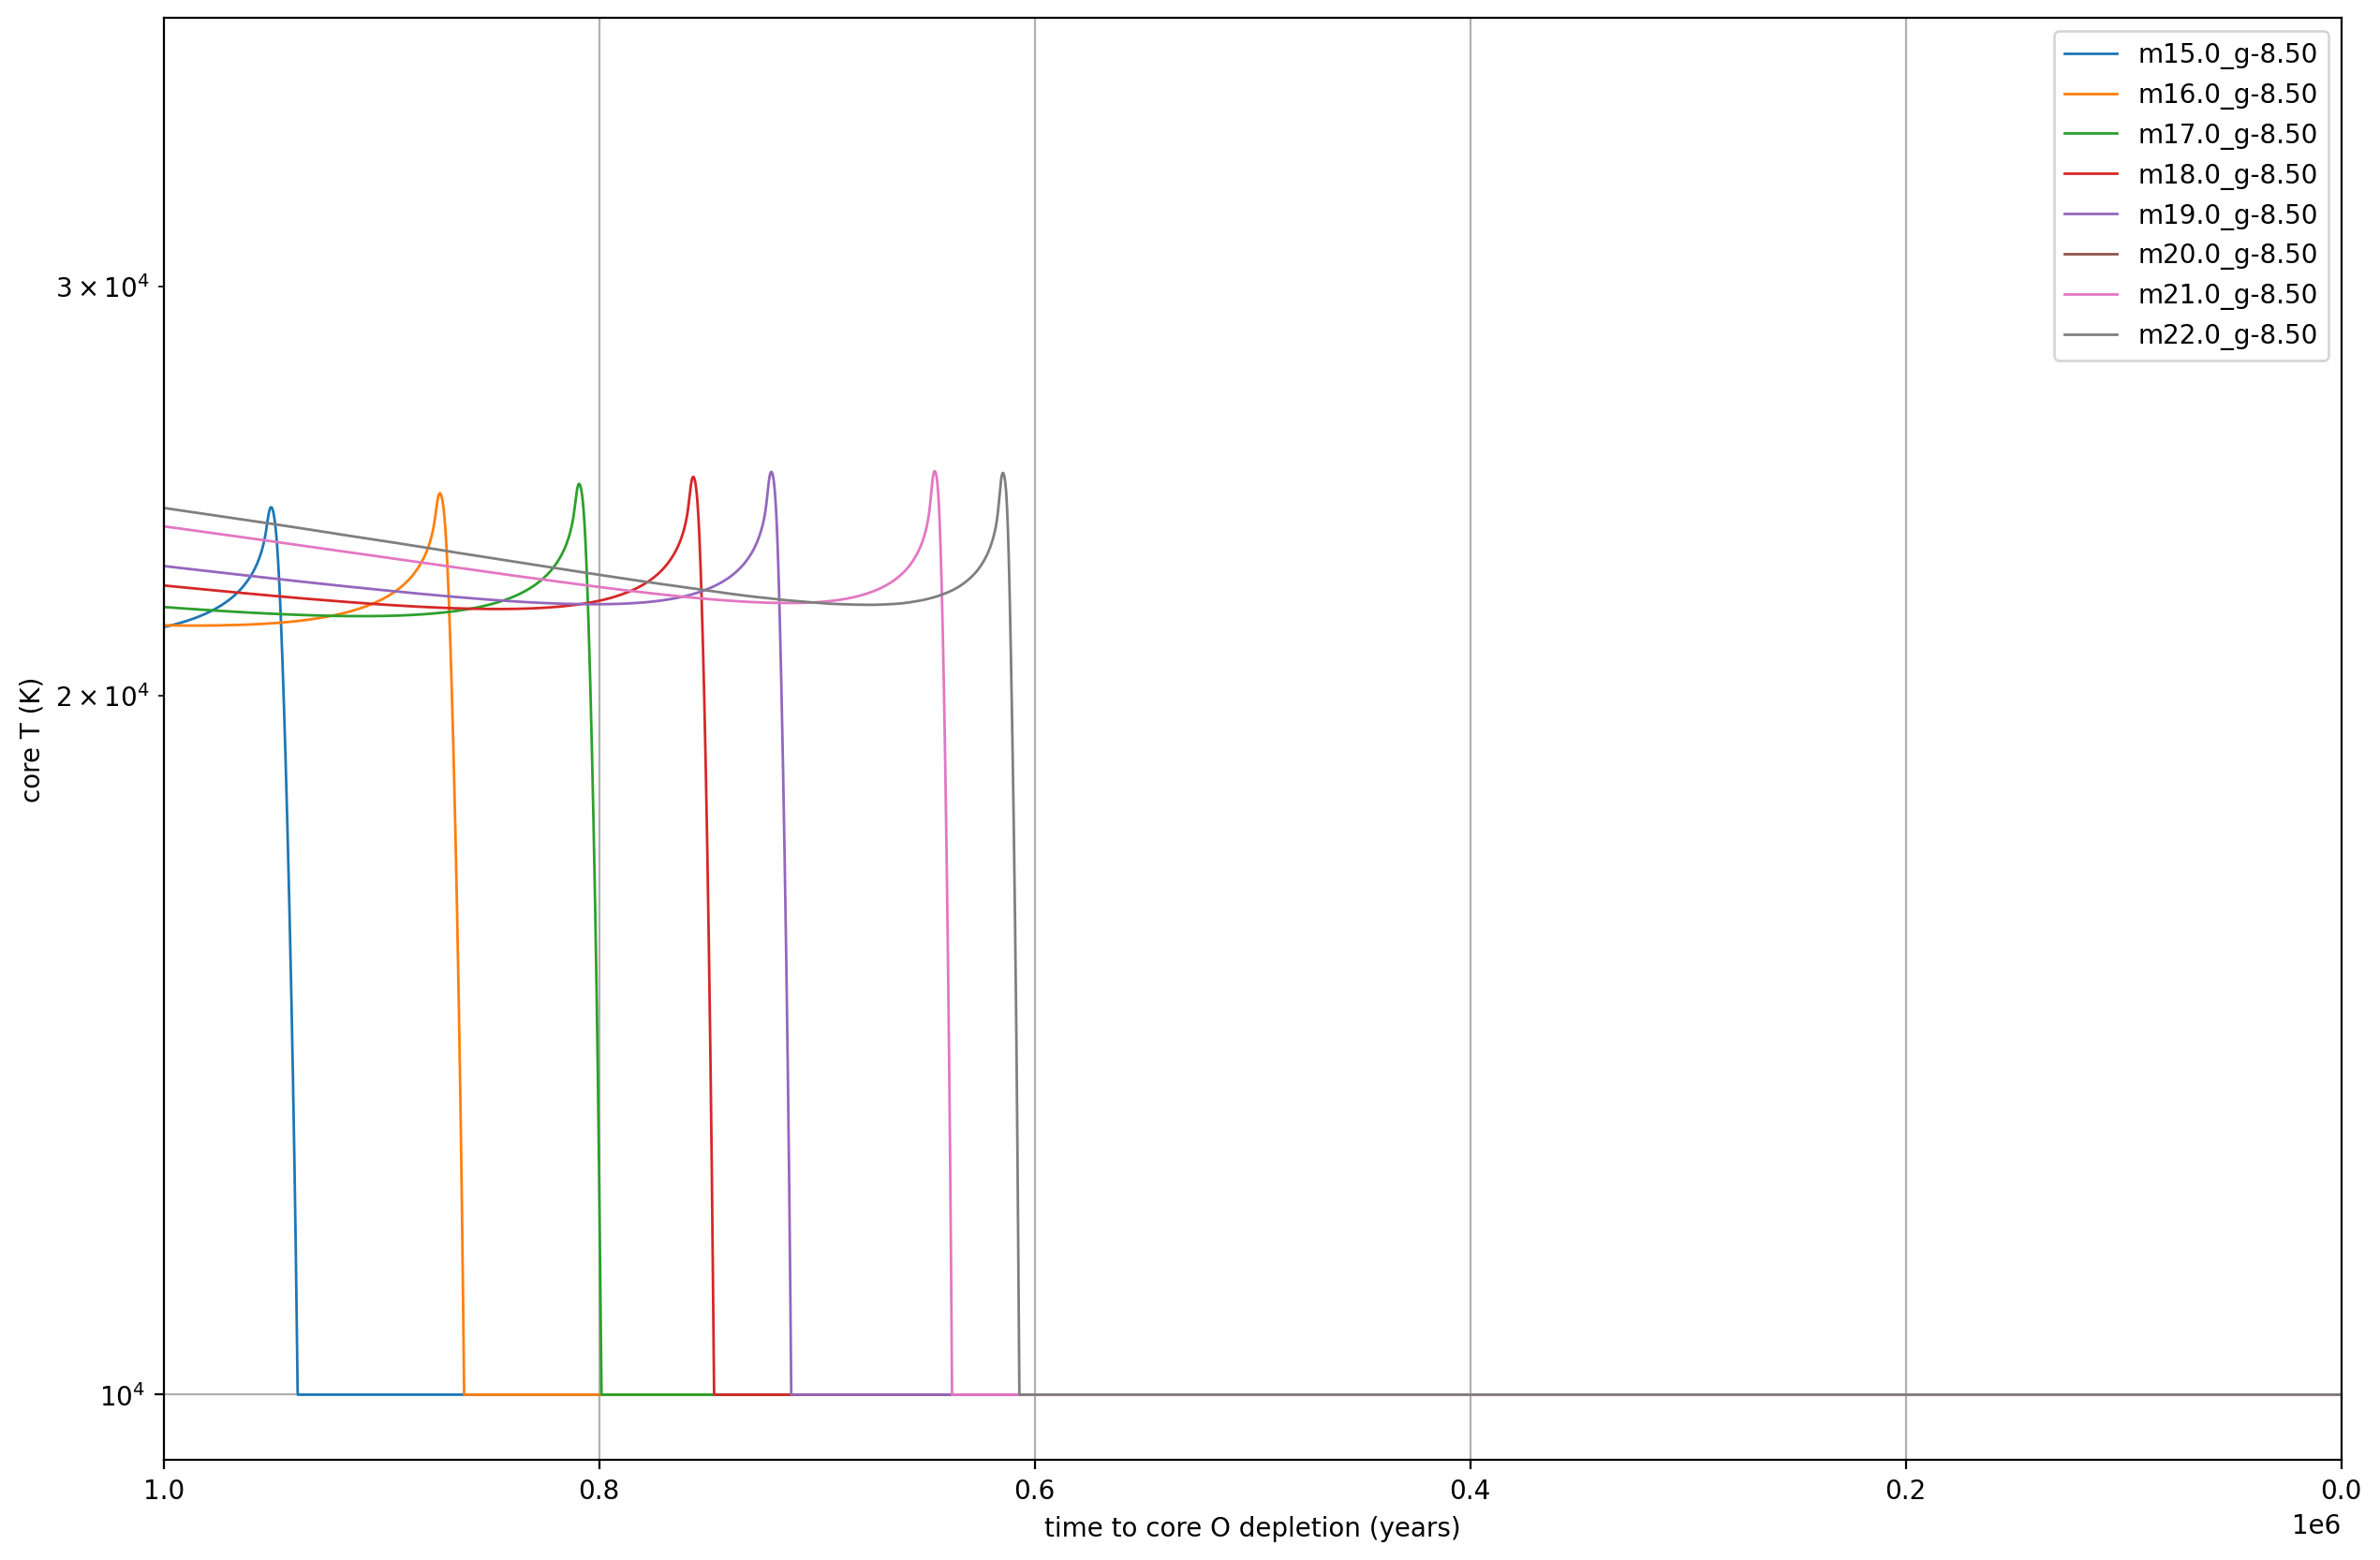

In [52]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
# plt.ylim(1e20, 1e36)
plt.xlim(1e6, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('core T (K)')
plt.grid()
plt.legend()

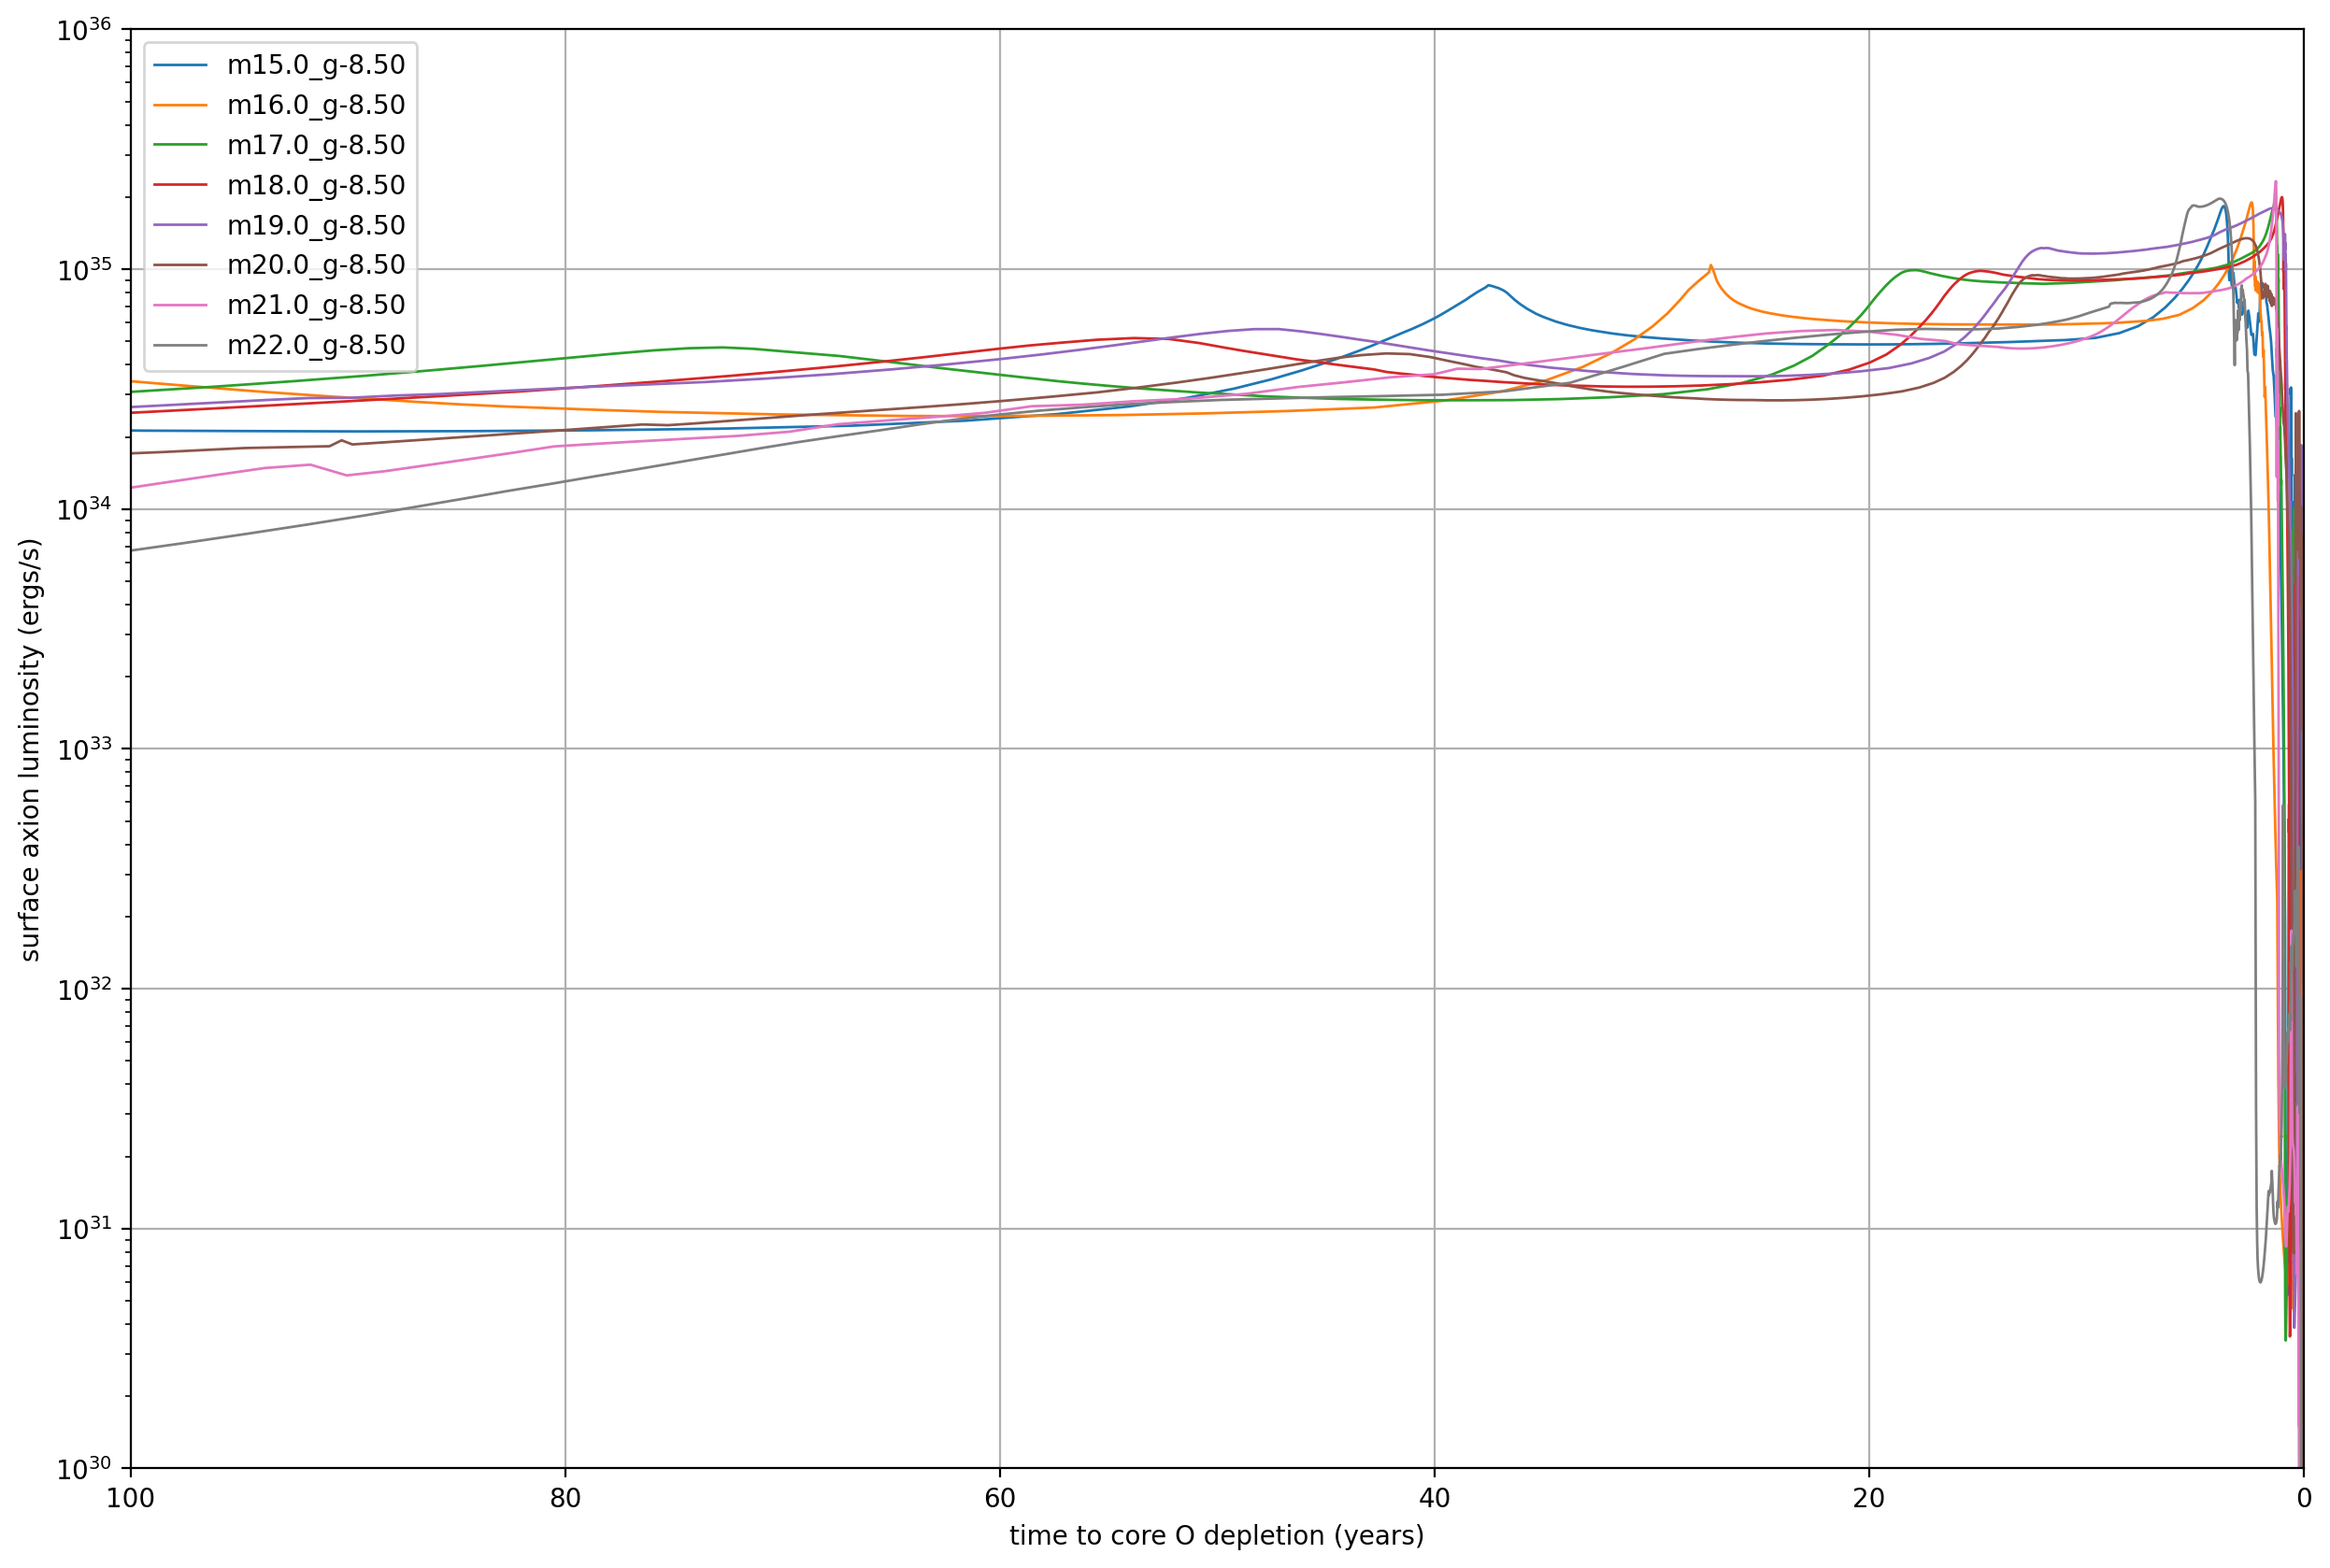

In [53]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
plt.ylim(1e30, 1e36)
plt.xlim(1e2, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('surface axion luminosity (ergs/s)')
plt.grid()
plt.legend()

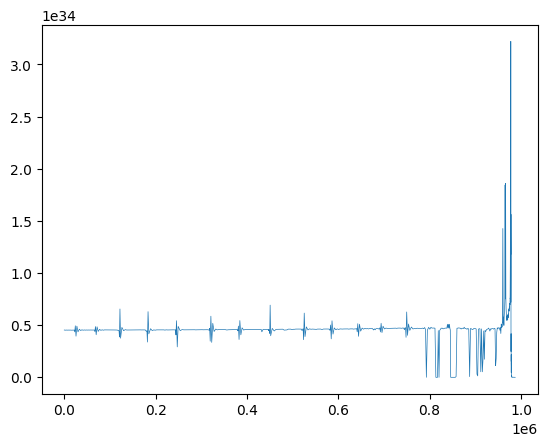

In [10]:
run = runs['g-7.0']
plt.plot(run['time to core O depletion (years)'], np.maximum(10, run['surface lum_a (ergs/s)']), lw=0.5)
# plt.xlim(1000, 0)

In [49]:
np.min(np.array(run['surface lum_a (ergs/s)']))

np.float64(-4.227117894505061e+36)